---

# Session 3. Principle of decision trees and evaluation measures (Part2)

---



A tree is an **undirected** and **connected** graph. The set of nodes is divided into three categories:

- Root node (access to the tree is via this node),

- Internal nodes: nodes that have descendants (or children), who are in turn nodes,

- Terminal nodes (or leaves): nodes that have no descendants.

A decision tree is a machine-learning algorithm for solving **classification** and **regression** problems. They are  simple, **easy to understand** and to **interpret** by human.


Here are the algorithm steps: 

### Decision Tree Building Steps
---------------------------------------------------------------------------------------------------
1. **Search for the Best Split**  
   - For each feature, try all possible split points.  
   - Calculate a score (e.g., variance reduction for regression, entropy/gini for classification).  
   - Select the split with the best score.

2. **Split the Data**  
   - Divide the dataset into two subsets based on the chosen split.

3. **Repeat Recursively**  
   - Apply steps 1 and 2 to each subset.  
   - Continue until a stopping condition is met (e.g., all samples in a node belong to the same class, or maximum tree depth is reached).

4. **Make Predictions**  
   - For a new sample, follow the splits from the root to a leaf.  
   - Predict the value/class associated with that leaf.

-----------------------------------------------------------------------------------------------------

#### Step 1: Search for the Best Split

- The algorithm examines all features.
- For each feature, it tests all possible split points (thresholds).
- It calculates a score for each split (e.g., variance reduction for regression).
- The split with the best score (lowest weighted variance) is selected to divide the data.

---

#### Simple Decision Tree Split Example

##### Data:

| Day | Temp (target) |
|-----|---------------|
| 1   | 10            |
| 2   | 15            |
| 3   | 20            |

---

##### a) Possible splits for Day

- Split at **Day < 1.5**  
- Split at **Day < 2.5**

---

##### b) Test split at Day < 1.5

- **Left group:** Day 1 → Temp = 10  
- **Right group:** Day 2, 3 → Temp = [15, 20]

**Calculate variances:**

- Left group variance = 0 (only one value) 
- Right group mean = $(15 + 20) / 2 = 17.5$ 
- Right group variance = $((15 - 17.5)² + (20 - 17.5)²) / 2 = 6.25$

**Weighted variance:**

\[
$\frac{1}{3} \times 0 + \frac{2}{3} \times 6.25 = 4.17$
\]

---

##### c) Test split at Day < 2.5

- **Left group:** Day 1, 2 → Temp = [10, 15]  
- **Right group:** Day 3 → Temp = 20

**Calculate variances:**

- Left group mean = $(10 + 15) / 2 = 12.5$  
- Left group variance = $((10 - 12.5)² + (15 - 12.5)²) / 2 = 6.25$  
- Right group variance = 0 (only one value)

**Weighted variance:**

\[
$\frac{2}{3} \times 6.25 + \frac{1}{3} \times 0 = 4.17$
\]

---

##### d) Choose the best split

- Both splits have the same weighted variance = 4.17  
- Therefore, either split is equally good in this example.

---


####  Test split at Day < 2.5
           [Day < 2.5?]
            /       \
         Yes         No
        /             \
   Temp ≈ 12.5     Temp ≈ 20

   (mean of 
   day 1 and
   day 2)
   
####  Test split at Day < 1.5   
   
        [Day < 1.5?]
            /       \
         Yes         No
        /             \
   Temp ≈ 10       Temp ≈ 17.5
                  (mean of day 2 and 3)


##### Train/test dataset division 
Divide the data set (X and Y) into two parts - a training set and a test set. 

![training split](Training_Test_Split.png)

In [5]:
'''Take 30% at random and place it in your test set and 70% in the training set. 
Random_state: controls the shuffling applied to the data before applying the split'''

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Size of the training set :", X_train.shape)
print("Size of the test set :", X_test.shape)

Size of the training set : (105, 4)
Size of the test set : (45, 4)


##### Decision tree training (max depth=2)

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Create a decision tree classifier with a tree depth=2
clf = DecisionTreeClassifier(max_depth=2)

#Fit the classifier to your training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

##### Decision tree display

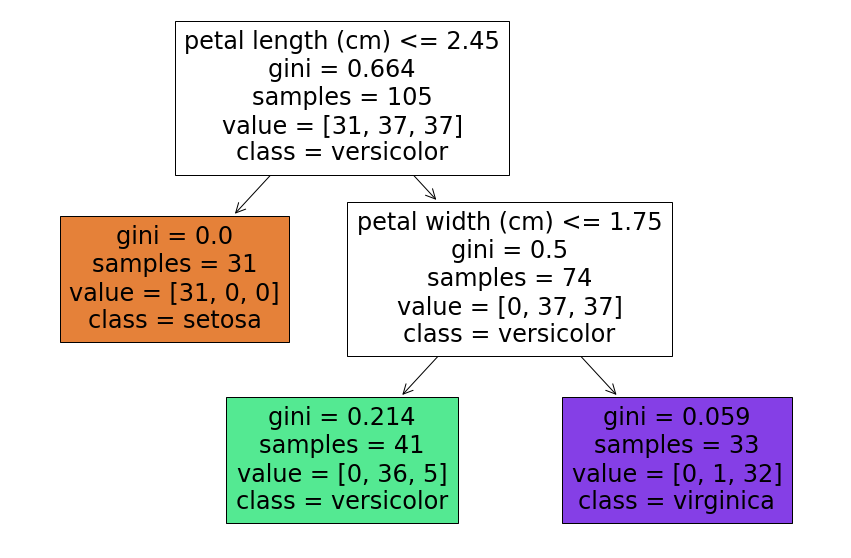

In [7]:
# Plot the decision tree
plt.figure(figsize=(15, 10)) # Adjust the figure size as needed
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names) # Replace feature names with your actual feature names
plt.show()

As you can see, the algorithm starts by searching the best split (here it's petal length). Depending on the value of petal length, it creates two internal nodes. A right node and a left node. The node on the left represents if petal length <= 2.45 and the node on the right represents a node if petal length>2.45. In each node, there are 4 variables:

- **gini**: impirity index that helps us choose the feature.
- **samples** : the number of observations in the training set that verified (or not) the condition of the previous level node. 
-  **value** : indicates the distribution of these observations in the different classes [x, y, z]: X setosa, Y versicolor and z virginica.
- **class** : corresponding class for this node 


##### Create a decision tree classifier with a maximum depth

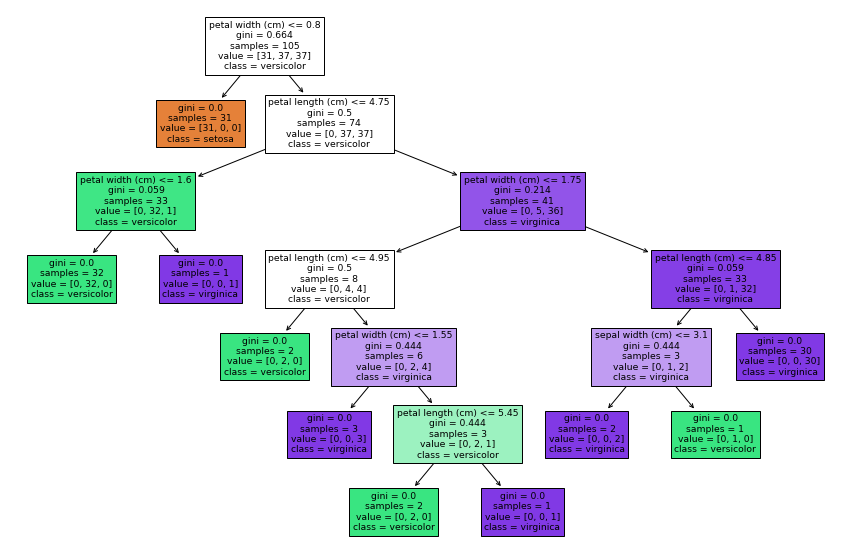

In [10]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

##### Test our decision tree for an example of the test set

In [9]:
'''Look at the tree to determine the class of this instance (instance 3 of the test set)
The name of features : 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'''
example = X_test[3].reshape(1, -1)
print (example)

[[6.  2.9 4.5 1.5]]


In [12]:
#check your result with the model 
predicted_class = clf.predict(example)
print("Predicted class for specific example :", iris.target_names[predicted_class])
print ("Real class:", iris.target_names[y_test[3]])

Predicted class for specific example : ['versicolor']
Real class: versicolor


##### Testing our decision tree for the whole test set

In [13]:
y_pred = clf.predict(X_test)

##### Evaluate our decision tree (confusion matrix, accuracy, recall, precision and F1 score) 

In [14]:
print(y_test) #real instances

print (y_pred) #predicted instances

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


### Evaluation measures 

##### Confusion matrix

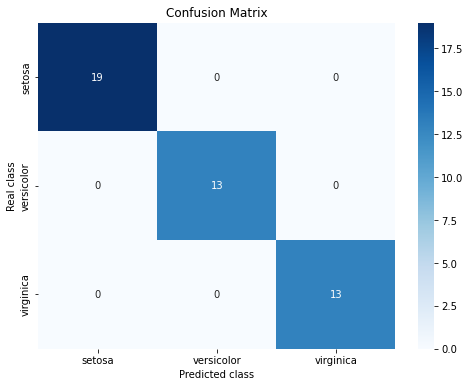

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted class')
plt.ylabel('Real class')
plt.title('Confusion Matrix')
plt.show()

In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculation of confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculation of accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculation of precision
precision = precision_score(y_test, y_pred, average='micro')

# Recall calculation
recall = recall_score(y_test, y_pred, average='micro')

# F1 score calculation
f1 = f1_score(y_test, y_pred, average='micro')

# Display results
print("Confusion matrix:")
print(conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Confusion matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


##### Binary classification exercise 

In [17]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Definition of actual and predicted values
ACTUAL = [1, 0, 0, 1, 1, 0, 1, 1, 0, 0]
PREDICTION = [1, 0, 1, 1, 1, 0, 1, 0, 1, 0]


# Calculation of confusion matrix
conf_matrix = confusion_matrix(ACTUAL, PREDICTION)

# Display confusion matrix
print("Confusion matrix:")
print(conf_matrix)


Confusion matrix:
[[3 2]
 [1 4]]


In [18]:
# Calculation of the rate of correct classification 
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / np.sum(conf_matrix)

# Display accuracy
print("Accuracy:", accuracy)


Accuracy: 0.7


In [19]:
# Calculation of precision
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])

# Display precision
print("Precision:", precision)

Precision: 0.6666666666666666


In [20]:
# Recall calculation
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])

# Display recall
print("Recall:", recall)


Recall: 0.8


In [21]:
# F1 score calculation
f1_score = 2 * (precision * recall) / (precision + recall)

# Display F1 score
print("Score F1:", f1_score)


Score F1: 0.7272727272727272
